In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import os
import sys

# Set style
plt.rcParams['figure.figsize'] = (14, 7)

In [2]:
# Load the dataset
data_path = os.path.join('..', 'data', 'ML471_S1_Datafile_Concept.csv')
df = pd.read_csv(data_path)

# Parse DATE. Based on inspection, it seems to be MM-DD-YYYY (Monthly data)
df['DATE'] = pd.to_datetime(df['DATE']) # default is often month-first for this format
df.set_index('DATE', inplace=True)

# Ensure frequency is set (monthly)
df = df.asfreq('MS') 

# Handle any missing values if they were introduced
if df['Consumption'].isnull().any():
    df['Consumption'] = df['Consumption'].interpolate()

df.head()

,Consumption,Festivals/Special_events
DATE,,
1988-01-01,107.5052,6
1988-02-01,105.6720,1
1988-03-01,97.4502,1
1988-04-01,92.4714,1
1988-05-01,90.3151,1


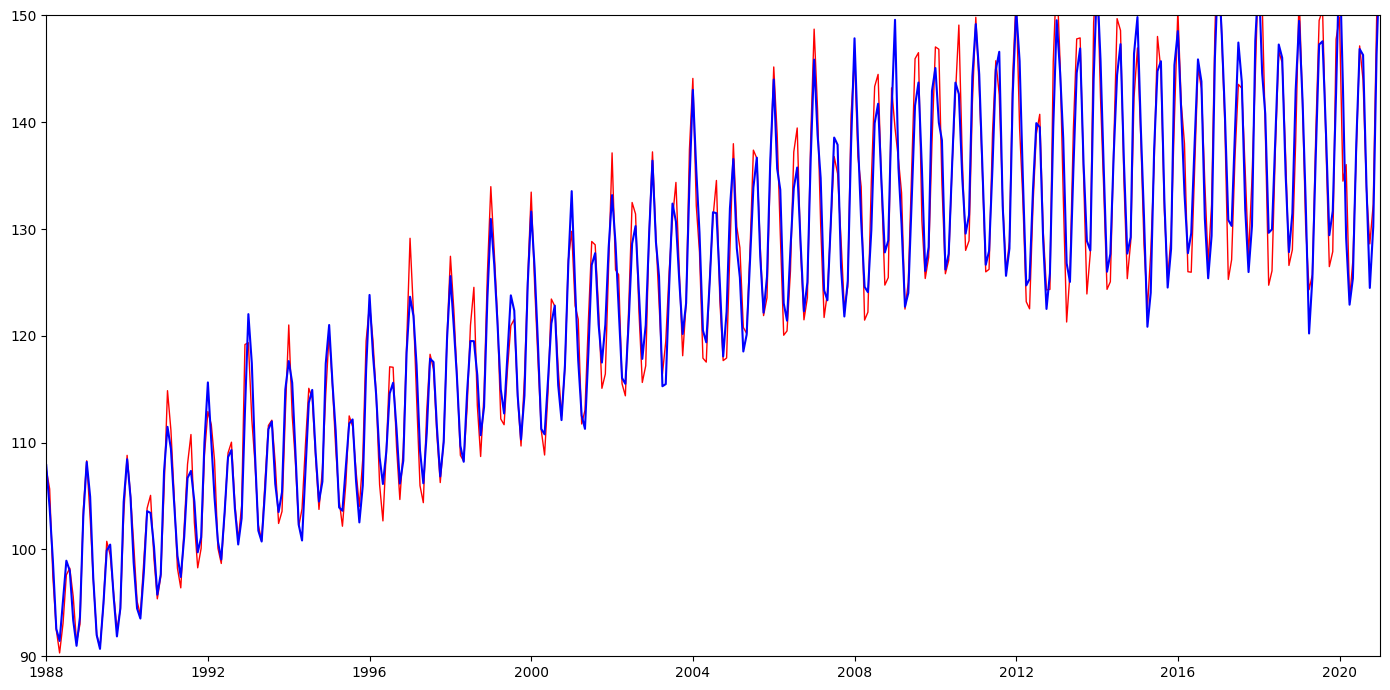

In [3]:
# Apply Exponential Smoothing (Holt-Winters)
# The plot shows trend and seasonality. 
# We'll use additive trend and additive seasonality.
model = ExponentialSmoothing(df['Consumption'], trend='add', seasonal='add', seasonal_periods=12).fit()
df['Smoothed'] = model.fittedvalues

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Consumption'], color='red', label='Original Consumption', linewidth=1)
plt.plot(df.index, df['Smoothed'], color='blue', label='Final Exponential Smoothing', linewidth=1.5)

# Formatting to match the sample
plt.ylim(90, 150)
plt.xlim(df.index.min(), df.index.max())

# The sample has years on the x-axis: 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020.
years = range(1988, 2021, 4)
plt.xticks([pd.Timestamp(str(year)) for year in years], [str(year) for year in years])

plt.grid(False) 
plt.tight_layout()
plt.show()